In [1]:
import cv2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img1 = cv2.imread('messi5.jpg', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('opencv-logo-white.png', cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

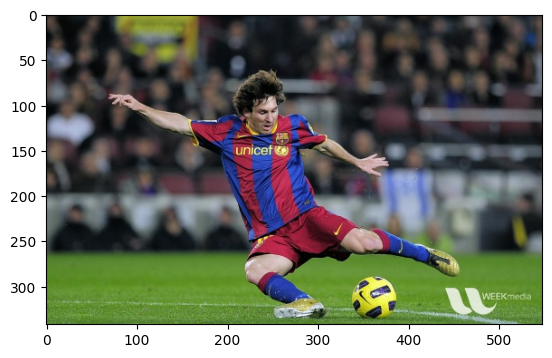

In [4]:
plt.imshow(img1)

In [5]:
img1.shape

(342, 548, 3)

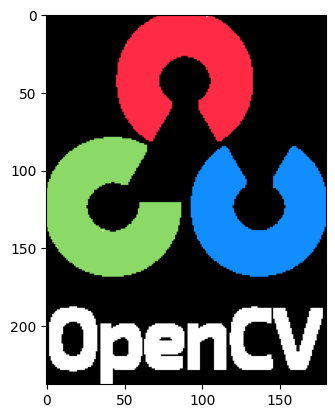

In [6]:
plt.imshow(img2)

In [7]:
img2.shape

(238, 180, 3)

(238, 180, 3)


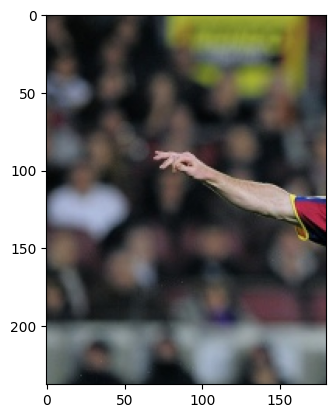

In [8]:
x_offset = 0
y_offset = 0
rows, cols,channels= img2.shape
x_end = x_offset + cols
y_end = y_offset + rows

roi = img1[y_offset:y_end, x_offset:x_end]

plt.imshow(roi)
print(roi.shape)

(238, 180)


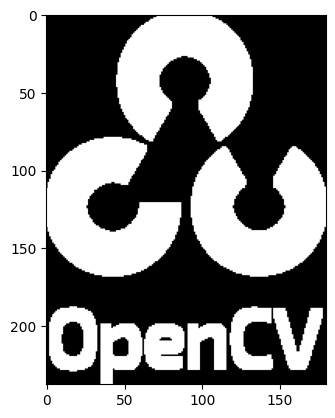

In [14]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
ret, mask = cv2.threshold(img2_gray, 10, 255, cv2.THRESH_BINARY)

print(mask.shape)

plt.imshow(mask, cmap='gray')

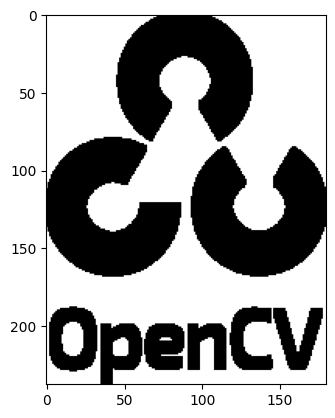

In [16]:
mask_inv= cv2.bitwise_not(mask)

plt.imshow(mask_inv, cmap='gray')

In [17]:
mask_inv.shape

(238, 180)

In [18]:
roi.shape

(238, 180, 3)

(238, 180, 3)


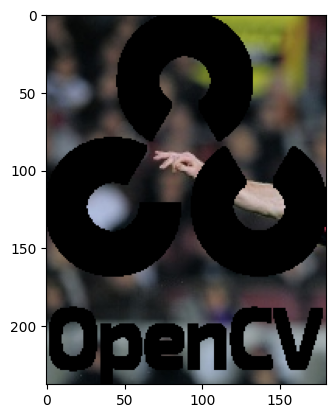

In [19]:
roi_background = cv2.bitwise_and(roi, roi, mask=mask_inv)

print(roi_background.shape)

plt.imshow(roi_background)

(238, 180, 3)


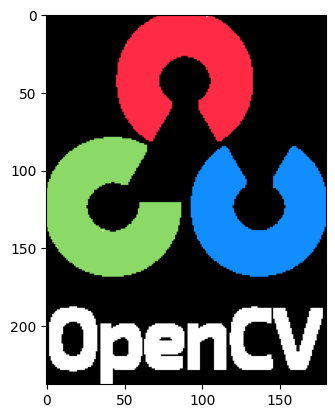

In [20]:
roi_foreground = cv2.bitwise_and(img2, img2, mask=mask)
print(roi_foreground.shape)
plt.imshow(roi_foreground)

(238, 180, 3)


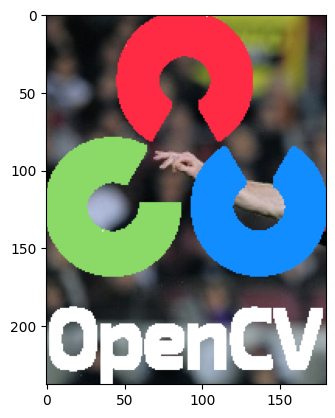

In [21]:
final_roi = cv2.add(roi_background, roi_foreground)

print(final_roi.shape)

plt.imshow(final_roi)

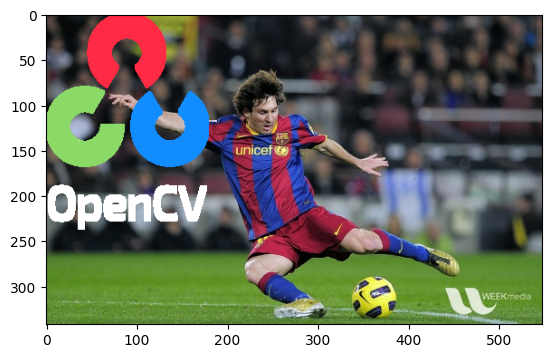

In [22]:
img1[y_offset:y_end, x_offset:x_end] =final_roi

plt.imshow(img1)